In [61]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [62]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [63]:
HEIGHT_IMG=48 
WIDTH_IMG = 48
btch_size=32

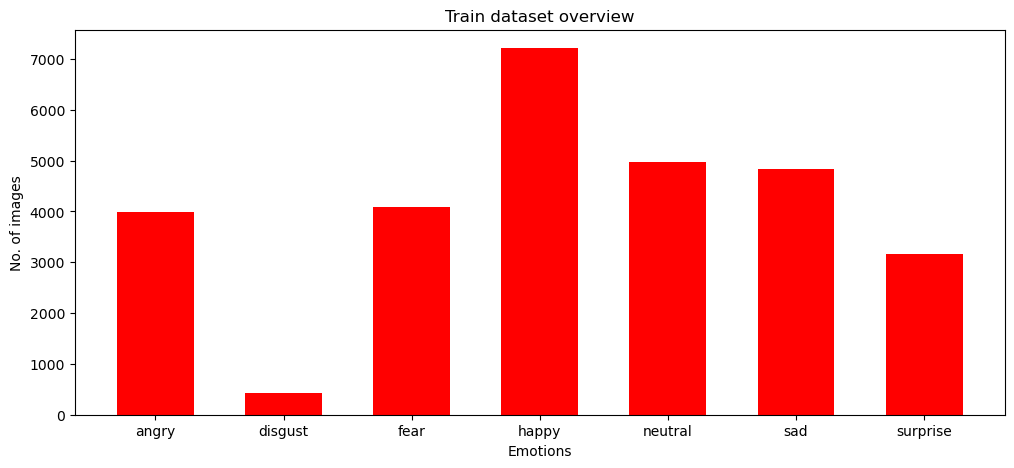

In [64]:
emotions = os.listdir('D:\\train')
values = [len(os.listdir(f'D:\\train\\{emotion}')) for emotion in emotions]
figure = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.bar(emotions, values, color ='red',
        width = 0.6)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Train dataset overview")
plt.show()

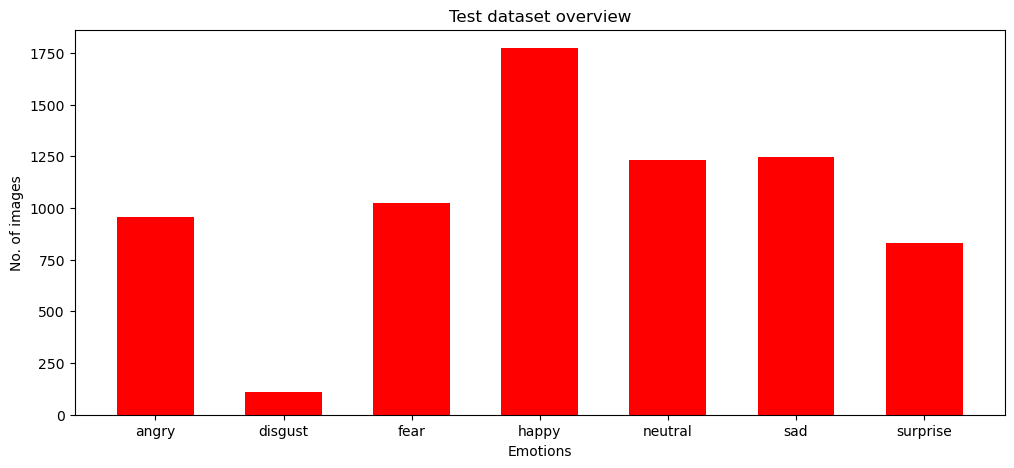

In [65]:
emotions1 = os.listdir('D:\\test')
values = [len(os.listdir(f'D:\\test\\{emotion}')) for emotion in emotions1]
figure = plt.figure(figsize = (12, 5))

# creating the bar plot
plt.bar(emotions1, values, color ='red',
        width = 0.6)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Test dataset overview")
plt.show()

In [66]:
data_train_dir='D:\\train'
data_test_dir='D:\\test'

In [67]:
def images_plot(dir_image, top=5):
    all_dirs_image = os.listdir(dir_image)
    files_image = [os.path.join(dir_image, file) for file in all_dirs_image][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, path_image in enumerate(files_image):
        plt.subplot(6, 6, idx+1)
        img = plt.imread(path_image)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

Angry: 



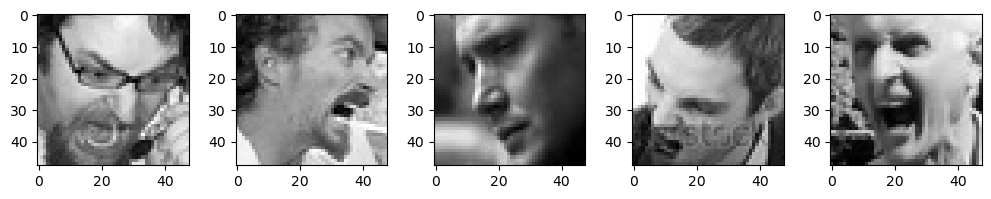

In [68]:
print('Angry: ')
print()
images_plot(data_test_dir+'\\angry')

Fear: 



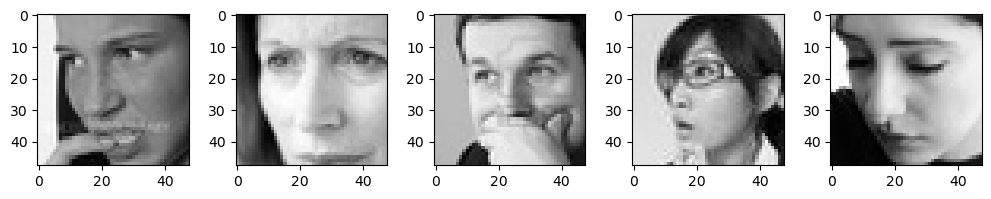

In [69]:
print('Fear: ')
print()
images_plot(data_train_dir+'\\fear')

Happy: 



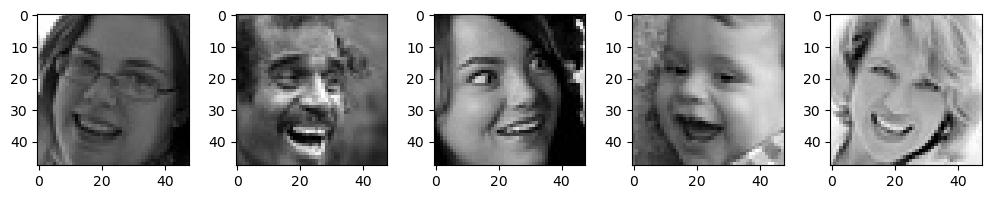

In [70]:
print('Happy: ')
print()
images_plot(data_train_dir+'\\happy')

sad: 



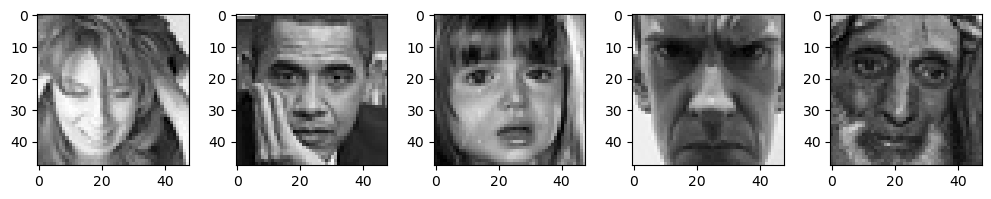

In [71]:
print('sad: ')
print()
images_plot(data_train_dir+'\\sad')

Disgust: 



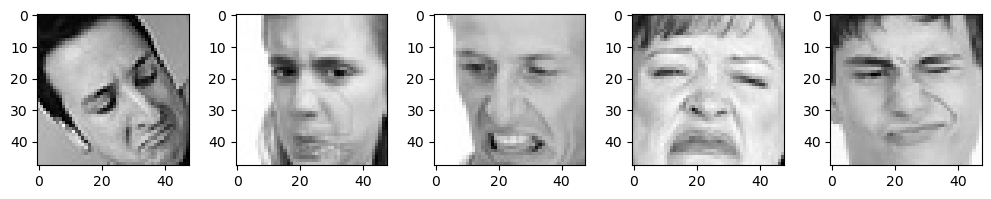

In [72]:
print('Disgust: ')
print()
images_plot(data_train_dir+'\\disgust')

Neutral: 



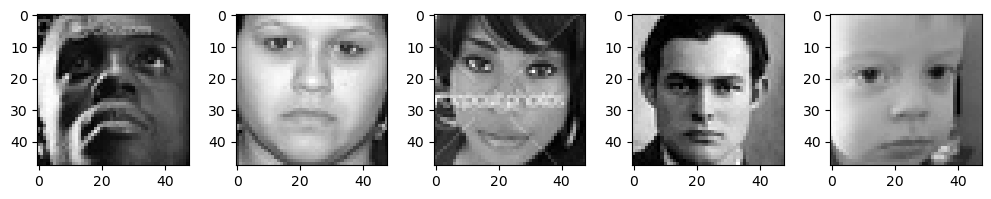

In [73]:
print('Neutral: ')
print()
images_plot(data_train_dir+'\\neutral')

Surprise: 



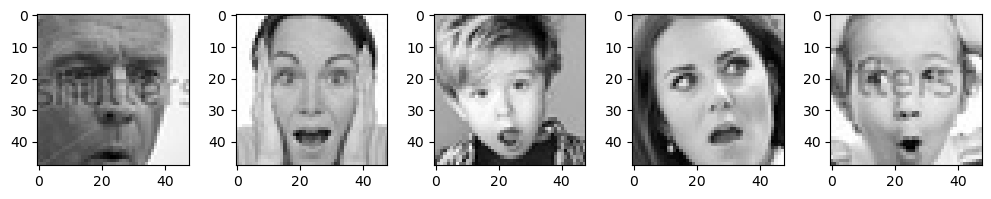

In [74]:
print('Surprise: ')
print()
images_plot(data_train_dir+'\\surprise')

In [75]:
#Image Augmentation
datagen_train = ImageDataGenerator(
					rescale=1./255,
					rotation_range=20,
					shear_range=0.1,
					zoom_range=0.1,
					horizontal_flip=True,
					fill_mode='nearest',validation_split=0.2) #Splitting training data 80% train,20% validation

In [76]:
#Train data
generator_train = datagen_train.flow_from_directory(
					data_train_dir,
					color_mode='grayscale',
					target_size=(HEIGHT_IMG, WIDTH_IMG),
					batch_size=btch_size,
					class_mode='categorical',subset='training',
					shuffle=True)

Found 22968 images belonging to 7 classes.


In [77]:
#Validation Data
generator_validation = datagen_train.flow_from_directory(
							data_train_dir,
							color_mode='grayscale',
							target_size=(HEIGHT_IMG, WIDTH_IMG),
							batch_size=btch_size,
							class_mode='categorical',subset='validation',
							shuffle=False)

Found 5741 images belonging to 7 classes.


In [78]:
#Test Data
generator_test = ImageDataGenerator(rescale=1./255).flow_from_directory(
							data_test_dir,
							color_mode='grayscale',
							target_size=(HEIGHT_IMG, WIDTH_IMG),
							batch_size=btch_size,
							class_mode='categorical',
							shuffle=False)

Found 7178 images belonging to 7 classes.


 ### CNN Algorithm Implementation starts

In [79]:
#Implementing CNN algorithm
import keras
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(),
                                                                            keras.metrics.Recall()])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [80]:
epochs=20
history=model.fit(generator_train,                   #Training Data
                steps_per_epoch=generator_train.n//generator_train.batch_size,
                epochs=epochs,        #Epochs used 20
                validation_data=generator_validation,      #Validation Data
                validation_steps=generator_validation.n//generator_validation.batch_size)

Epoch 1/20
717/717 [==============================] - 564s 755ms/step - loss: 1.7373 - accuracy: 0.2956 - precision_1: 0.5882 - recall_1: 0.0225 - val_loss: 1.6248 - val_accuracy: 0.3610 - val_precision_1: 0.6293 - val_recall_1: 0.0833
Epoch 2/20
717/717 [==============================] - 302s 421ms/step - loss: 1.5362 - accuracy: 0.4042 - precision_1: 0.6909 - recall_1: 0.1427 - val_loss: 1.4594 - val_accuracy: 0.4413 - val_precision_1: 0.7400 - val_recall_1: 0.1491
Epoch 3/20
717/717 [==============================] - 302s 422ms/step - loss: 1.4078 - accuracy: 0.4553 - precision_1: 0.7331 - recall_1: 0.2105 - val_loss: 1.3617 - val_accuracy: 0.4843 - val_precision_1: 0.6935 - val_recall_1: 0.2682
Epoch 4/20
717/717 [==============================] - 304s 423ms/step - loss: 1.3366 - accuracy: 0.4896 - precision_1: 0.7285 - recall_1: 0.2476 - val_loss: 1.3243 - val_accuracy: 0.4949 - val_precision_1: 0.7763 - val_recall_1: 0.2284
Epoch 5/20
717/717 [==============================] - 30

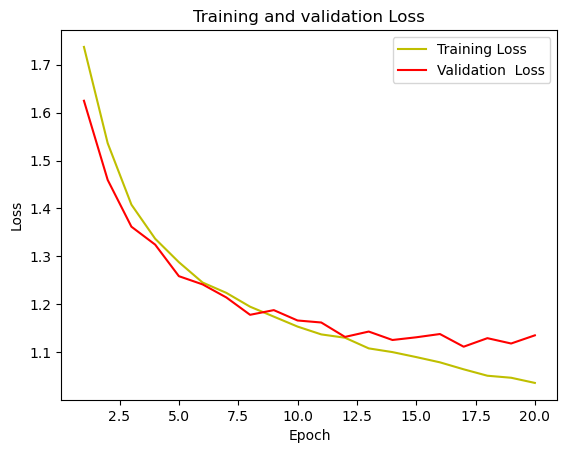

In [81]:
#Loss visualization
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.rcParams['figure.figsize'] = [5, 5]
plt.style.use(['default'])
# Create count of the number of epochs
count_epoch = range(1, len(loss_train) + 1)

# Plotting the graph
plt.plot(count_epoch,loss_train, 'y')
plt.plot(count_epoch,loss_val, 'r')
plt.legend(['Training Loss', 'Validation  Loss'])
plt.title('Training and validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

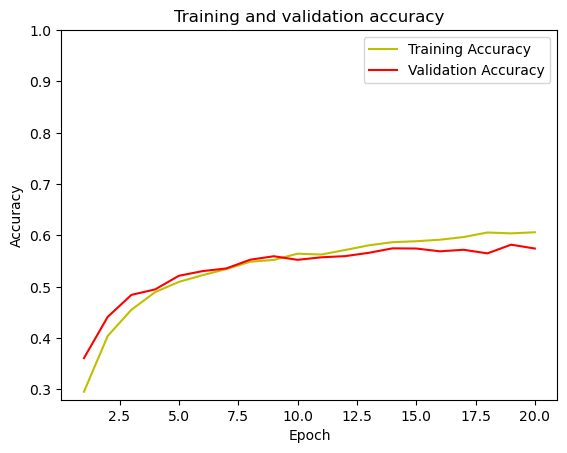

In [82]:
#Accuracy visualization
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']

# Create count of the number of epochs
count_epoch = range(1, len(accuracy_train) + 1)

#Plotting the graph
plt.plot(count_epoch,accuracy_train, 'y')
plt.plot(count_epoch,accuracy_val, 'r')
plt.title('Training and validation accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(top = 1)
plt.show()

In [83]:
model.save('cnng with 20 epochs.h5')

In [84]:
#Loading model 
from keras.models import load_model

#Testing the model
model_cnn1 = load_model('cnng with 25 epochs.h5', compile=False)

In [85]:
#Generate a batch of images
test_img, test_lbl = generator_test.__next__()
predictions=model_cnn1.predict(test_img)

1/1 [==============================] - 1s 1s/step


In [86]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [87]:
#Knowing Test accuracy
from sklearn import metrics
print ("Test Accuracy of CNN = ", metrics.accuracy_score(test_labels, predictions))


Test Accuracy of CNN =  0.53125


In [88]:
from sklearn.metrics import classification_report
#classification report 
clsf_report = pd.DataFrame(classification_report(test_labels, predictions, output_dict=True)).transpose()
clsf_report.to_csv('CNN_exampleadam_report2.csv', index= True)
clsf_report

C:\Users\Manas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0,1.000000,0.531250,0.693878,32.00000
1,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.00000
accuracy,0.531250,0.531250,0.531250,0.53125
macro avg,0.166667,0.088542,0.115646,32.00000
weighted avg,1.000000,0.531250,0.693878,32.00000


In [29]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(test_labels, predictions)
# # print(cm)
# import seaborn as sns
# sns.heatmap(cm, annot=True)

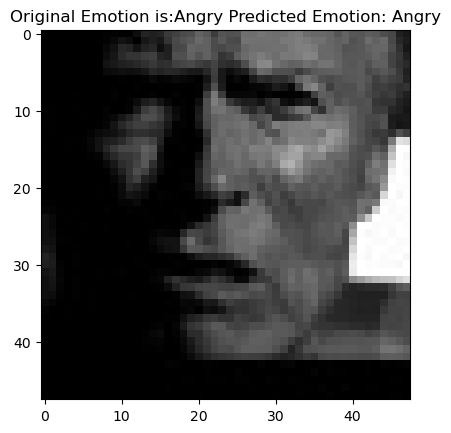

In [123]:
#Checking model on test data to predict emotion
import random
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

#Check results on a few select images

n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_emotion = class_labels[test_labels[n]]
pred_emotion = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original Emotion is:"+orig_emotion+" Predicted Emotion: "+ pred_emotion)
plt.show()

### SVM Algorithm Implementation starts

In [101]:
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [102]:
#Reading dataset
df=pd.read_csv(r"C:\Users\Manas\Downloads\fer2013.csv")
df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [103]:
#Trimming Data so that SVM algorithm can be implemented without any interuption and can take less space  
df_data=df.drop(labels=range(10708,35887),axis=0)
df_data.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [104]:
df_data['emotion'].value_counts()  #Here emotion 0:Angry,1:Disgust,2:Fear,3:Happy,4:Neutral,5:Sad,6:Surprise

3    2707
6    1840
4    1777
2    1539
0    1509
5    1161
1     175
Name: emotion, dtype: int64

In [105]:
df_data['Usage'].drop

<bound method Series.drop of 0        Training
1        Training
2        Training
3        Training
4        Training
           ...   
10703    Training
10704    Training
10705    Training
10706    Training
10707    Training
Name: Usage, Length: 10708, dtype: object>

In [106]:
df_data1=df_data.drop(columns='Usage')
df_data1.head(5)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [107]:
width,height=48,48
num_classes=7

In [108]:
df_data1['pixels']=df_data1['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
data_X=np.array(df_data1['pixels'].tolist(),dtype='float32')
data_Y=to_categorical(df_data1['emotion'],num_classes)
data_X.shape,data_Y.shape

((10708, 2304), (10708, 7))

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X,data_Y,test_size=0.2, random_state=50)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8566, 2304), (2142, 2304), (8566, 7), (2142, 7))

In [110]:
#Scaling data so that speed can be increased of SVM algorithm
from sklearn import preprocessing
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)

C:\Users\Manas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\Manas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
C:\Users\Manas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Users\Manas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the da

In [111]:
y_train=y_train[:,-1]
y_train.shape

(8566,)

In [112]:
y_test=y_test[:,-1]
y_test.shape

(2142,)

In [113]:
#SVM algorithm Implementation with rbf kernel
from sklearn.svm import SVC

model=SVC(kernel='rbf',gamma='auto',C=0.1)   #rbf kernel with C=0.1
model.fit(X_train,y_train)
emotion_predict=model.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score

print("Test Accuracy with rbf kernel",accuracy_score(y_test,emotion_predict))

Test Accuracy with rbf kernel 0.8277310924369747


C:\Users\Manas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


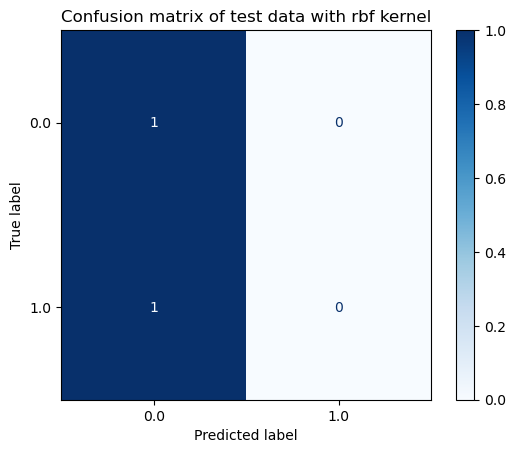

In [115]:
from sklearn.metrics import plot_confusion_matrix
import mlxtend
from mlxtend.plotting import plot_decision_regions
matrix = plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues,normalize='true')
plt.title('Confusion matrix of test data with rbf kernel')
plt.show(matrix)
plt.show()

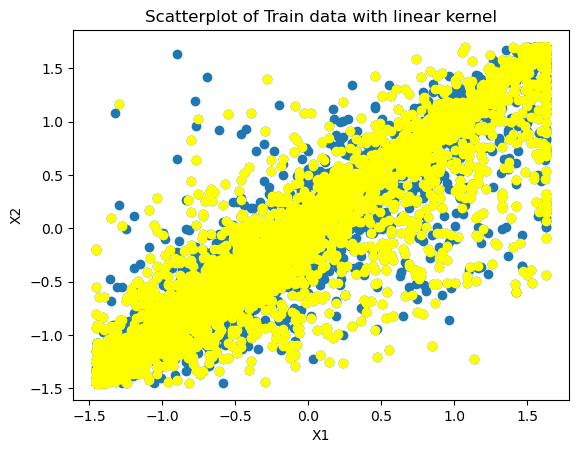

In [116]:
#Scatterplot of Train data
support_vectors=model.support_vectors_
plt.scatter(X_train[:,0],X_train[:,1])
plt.scatter(support_vectors[:,0],support_vectors[:,1],color='yellow')
plt.title('Scatterplot of Train data with linear kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

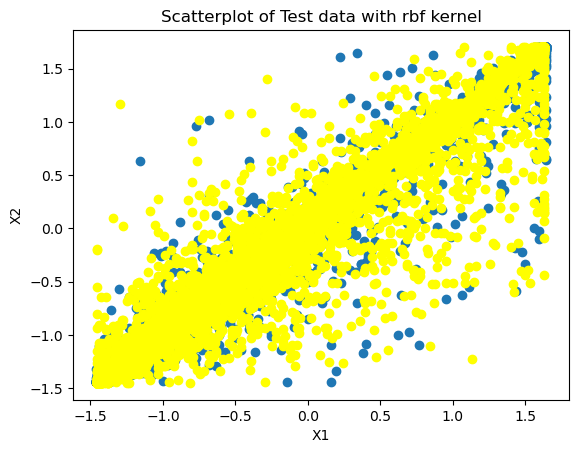

In [117]:
#Scatterplot of Test data with rbf kernel
support_vectors=model.support_vectors_
plt.scatter(X_test[:,0],X_test[:,1])
plt.scatter(support_vectors[:,0],support_vectors[:,1],color='yellow')
plt.title('Scatterplot of Test data with rbf kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [118]:
#classification report 
clsf_report = pd.DataFrame(classification_report(y_test, emotion_predict, output_dict=True)).transpose()
clsf_report.to_csv('SVM2_examplerbf_report1.csv', index= True)

C:\Users\Manas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Manas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
clsf_report

,precision,recall,f1-score,support
0.0,0.827731,1.000000,0.905747,1773.000000
1.0,0.000000,0.000000,0.000000,369.000000
accuracy,0.827731,0.827731,0.827731,0.827731
macro avg,0.413866,0.500000,0.452874,2142.000000
weighted avg,0.685139,0.827731,0.749715,2142.000000


In [119]:
#SVM algorithm implementation with linear kernel
from sklearn.svm import SVC

model1=SVC(kernel='linear',gamma='auto',C=0.1)
model1.fit(X_train,y_train)
emotion_predict1=model1.predict(X_test)


In [120]:
from sklearn.metrics import accuracy_score

print("Test Accuracy with linear kernel",accuracy_score(y_test,emotion_predict1))

Test Accuracy with linear kernel 0.7703081232492998


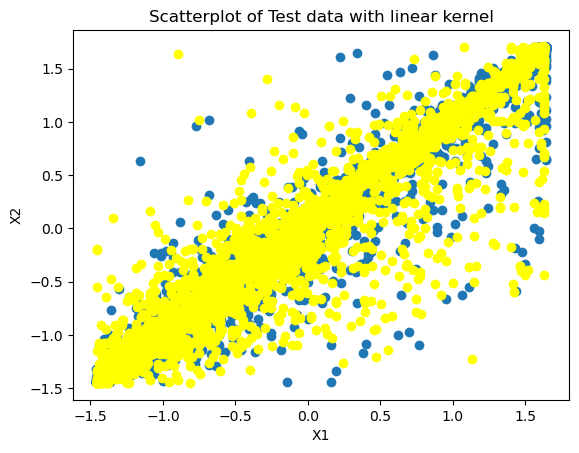

In [121]:
#Scatterplot of Test data with linear kernel
support_vectors=model1.support_vectors_
plt.scatter(X_test[:,0],X_test[:,1])
plt.scatter(support_vectors[:,0],support_vectors[:,1],color='yellow')
plt.title('Scatterplot of Test data with linear kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [122]:
clsf_report = pd.DataFrame(classification_report(y_test, emotion_predict1, output_dict=True)).transpose()
clsf_report.to_csv('SVM_examplelinear_report1.csv', index= True)
clsf_report

,precision,recall,f1-score,support
0.0,0.832382,0.904681,0.867027,1773.000000
1.0,0.213953,0.124661,0.157534,369.000000
accuracy,0.770308,0.770308,0.770308,0.770308
macro avg,0.523168,0.514671,0.512281,2142.000000
weighted avg,0.725846,0.770308,0.744803,2142.000000
